### 190648C
### VIKASITHA K.S.S.
#### ASSIGNMENT 01

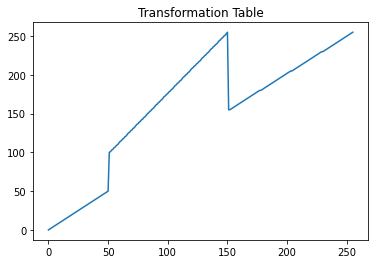

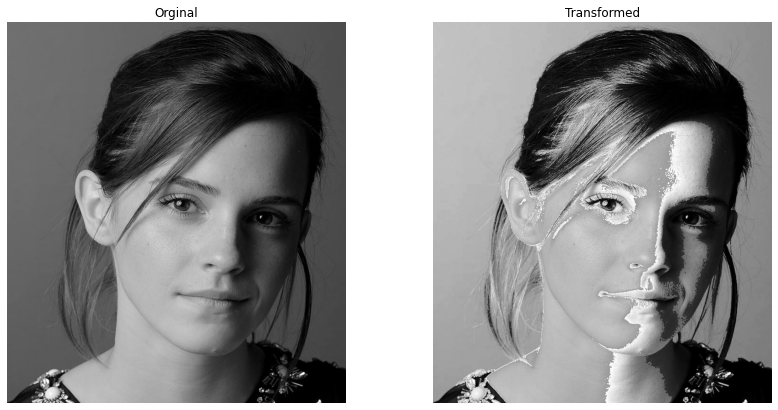

In [6]:
#Q1

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\emma_gray.jpg')
assert im is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(155,255,105)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
g = cv.LUT(im,t)

fig , ax = plt.subplots()
ax.plot(t)
ax.set_title("Transformation Table")

fig , ax = plt.subplots(1,2,figsize=(14,7))
ax[0].imshow(im)
ax[0].set_title("Orginal")
ax[0].axis('off')
ax[1].imshow(g)
ax[1].set_title("Transformed")
ax[1].axis('off')
plt.show()



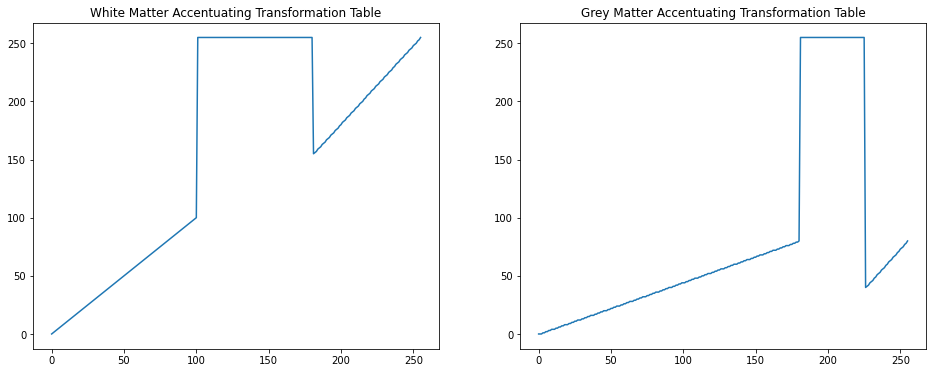

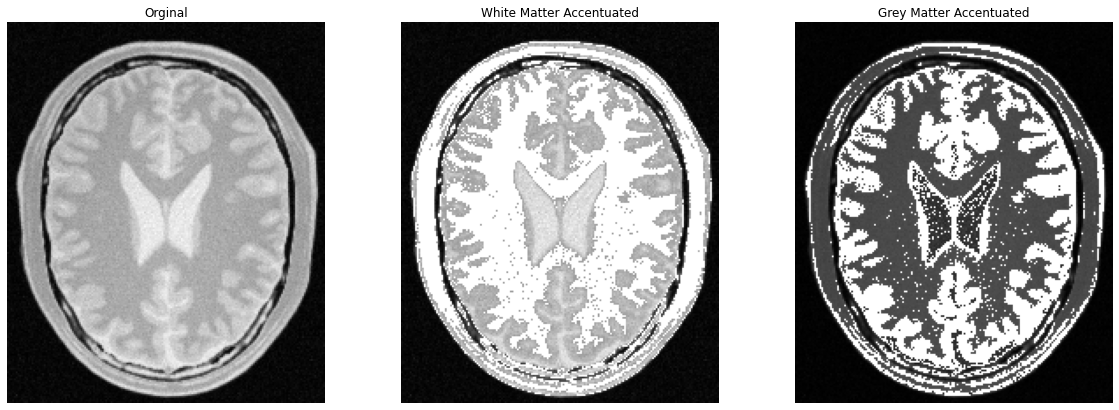

In [27]:
#Q2

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'Assignment-01 Materials\brain_proton_density_slice.png')
assert im is not None

# White Matter Accentuating Transformation Table
t1 = np.linspace(0,100,101)
t2 = np.linspace(255,255,80)
t3 = np.linspace(155,255,75)

t1_ = np.linspace(0,80,181)
t2_ = np.linspace(255,255,45)
t3_ = np.linspace(40,80,30)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
g = cv.LUT(im,t)

t_ = np.concatenate((t1_,t2_,t3_),axis=0).astype(np.uint8)
g_ = cv.LUT(im,t_)

fig , ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(t)
ax[0].set_title("White Matter Accentuating Transformation Table")
ax[1].plot(t_)
ax[1].set_title("Grey Matter Accentuating Transformation Table")

fig , ax = plt.subplots(1,3,figsize=(20,7))
ax[0].imshow(im)
ax[0].set_title("Orginal")
ax[0].axis('off')
ax[1].imshow(g)
ax[1].set_title("White Matter Accentuated")
ax[1].axis('off')
ax[2].imshow(g_)
ax[2].set_title("Grey Matter Accentuated")
ax[2].axis('off')
plt.show()
